# Solving the contact flow for the Harmonic Oscillator that generates the Gibbs distribution through the Taylor series integrator

In [75]:
using PyPlot #Para las gráficas

In [76]:
include("../contactTaylorAle.jl");

In [119]:
condinic = [0.0,0.5,1.0] # q, p, S ;

In [120]:
nsteps = 1000 #Número de pasos ;
ndescarte = 1 #Descarto los primeros pasos que pueden ser inútiles para la estadística;

In [121]:
beta = 1.; #beta = 1/T;
timestep = 0.01;

In [122]:
vec = contactIntegration(campoContacto, nsteps,condinic, timestep, beta);

**vec**  es una tupla de arreglos con entradas `(tiempo, q,p, S)` .
Cada elemento de la tupla es un arreglo de longitud *nsteps*, conteniendo los resultados de la integración de l campo a cada paso de tiempo.

In [123]:
t = vec[1][ndescarte:end]; q = vec[2][ndescarte:end]; p = vec[3][ndescarte:end]; S = vec[4][ndescarte:end];

## Espacio fase 

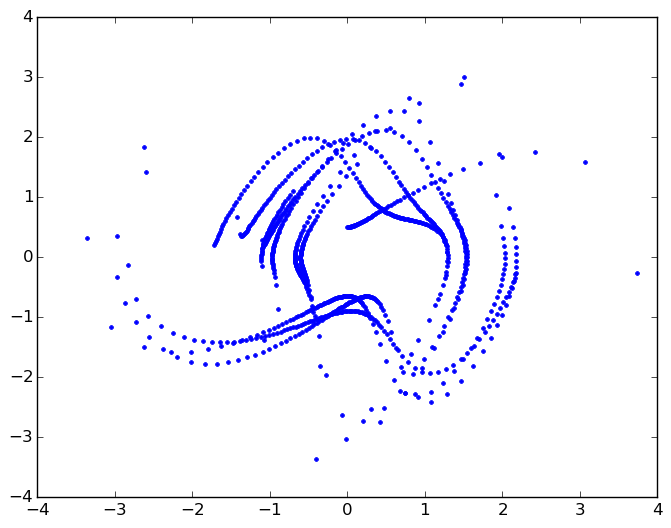

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f35a03c49d0>

In [124]:
plot(q,p,".")

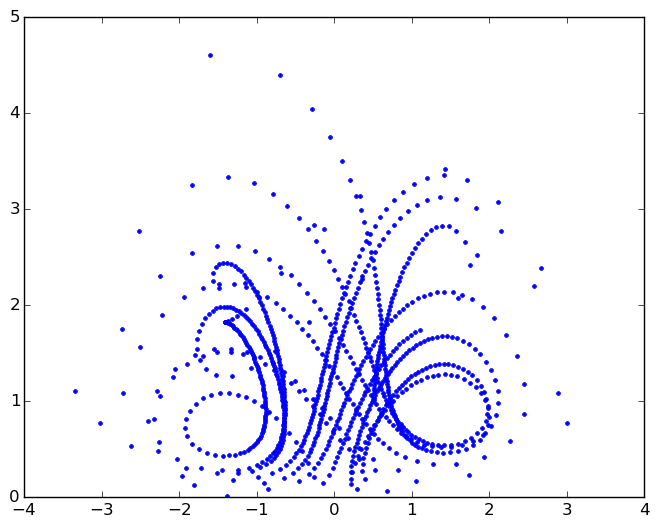

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f35a0320110>

In [125]:
plot(p,S,".")

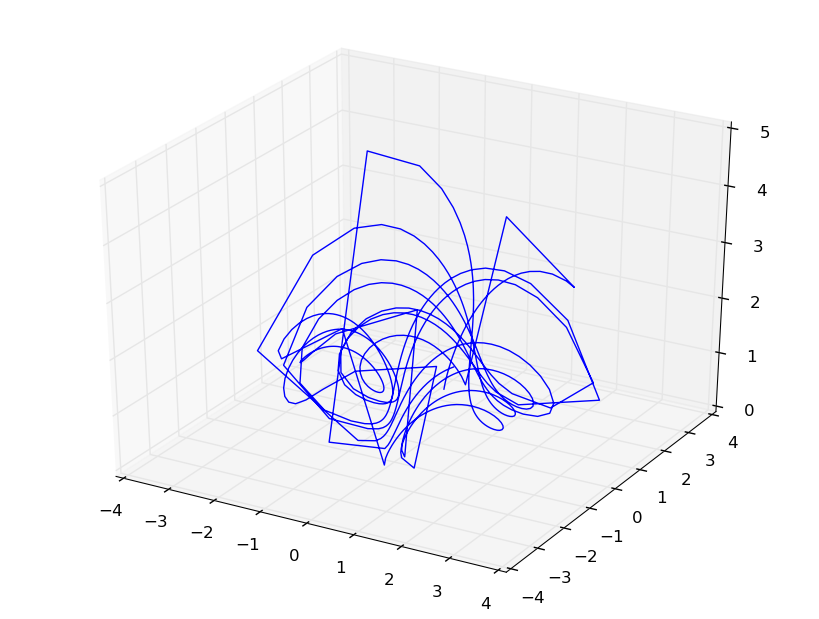

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f35a02b5f10>

In [126]:
#pygui(true);
fig = plt[:figure](1);
#ax = fig[:add_subplot](111);
ax = Axes3D(fig)
ax[:plot](p,q,S)

## p(t) y q(t)

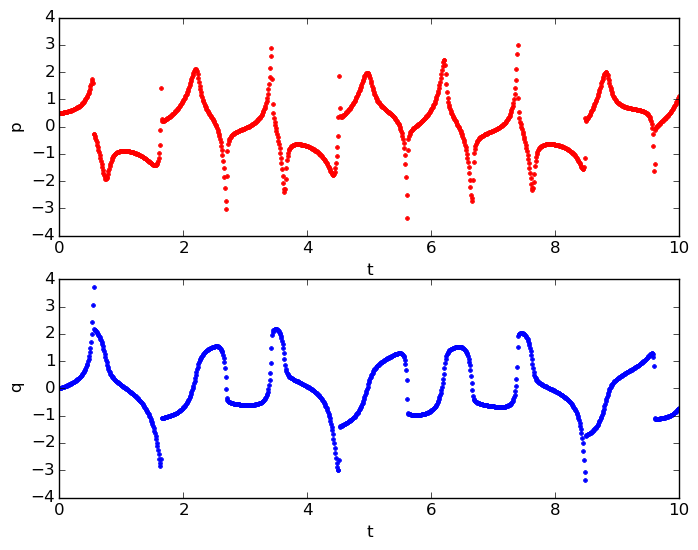

PyObject <matplotlib.text.Text object at 0x7f35a01427d0>

In [127]:
plt[:figure](1)
plt[:subplot](211)
plt[:plot](t, p, "r.")
plt[:xlabel]("t")
plt[:ylabel]("p")

plt[:subplot](212)
plt[:plot](t, q, "b.")
plt[:xlabel]("t")
plt[:ylabel]("q")

## Histogramas 

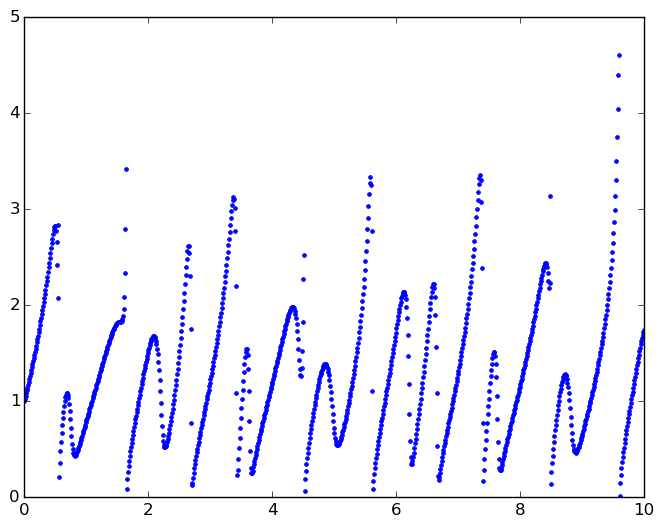

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f35a0007e50>

In [128]:
plot(t,S, ".")

In [129]:
nbins = 50;

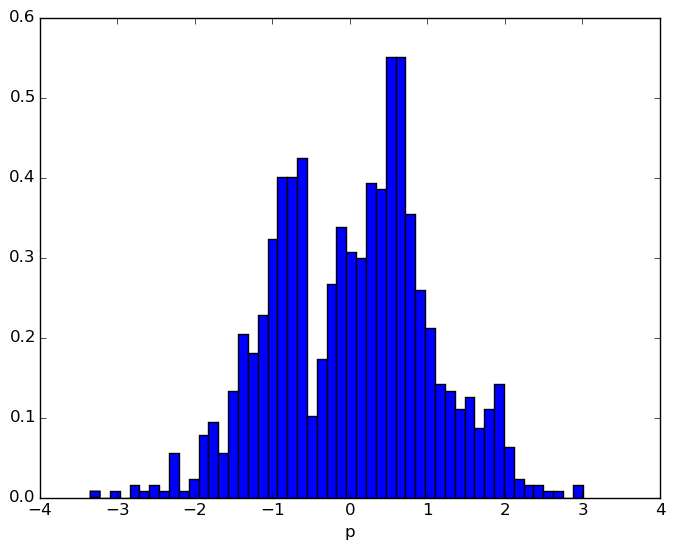

PyObject <matplotlib.text.Text object at 0x7f35a00a1890>

In [130]:
plt[:hist](p, nbins, normed = 1)
plt[:xlabel]("p")

In [93]:
sqrt(sum(p.^2)/(nsteps-ndescarte-1))

1.001270137942185

In [94]:
fit(Normal,p)

Distributions.Normal(μ=0.0024063009445066622, σ=1.0012327204075329)

In [95]:
E = (p.^2 + q .^2)/2.;

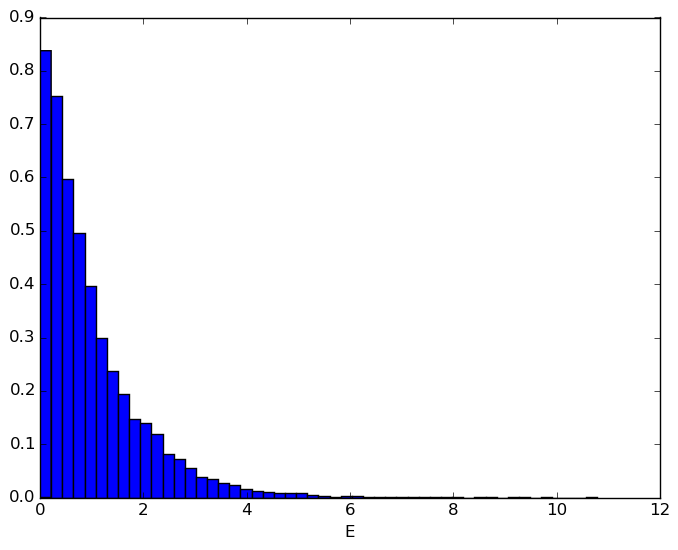

In [96]:
plt[:hist](E, 50, normed =1);
plt[:xlabel]("E");

In [97]:
fit(Exponential,E)

Distributions.Exponential(θ=1.0018643397014215)

In [98]:
expo = Exponential()

Distributions.Exponential(θ=1.0)

In [99]:
vectorenergia = rand(expo,100000);

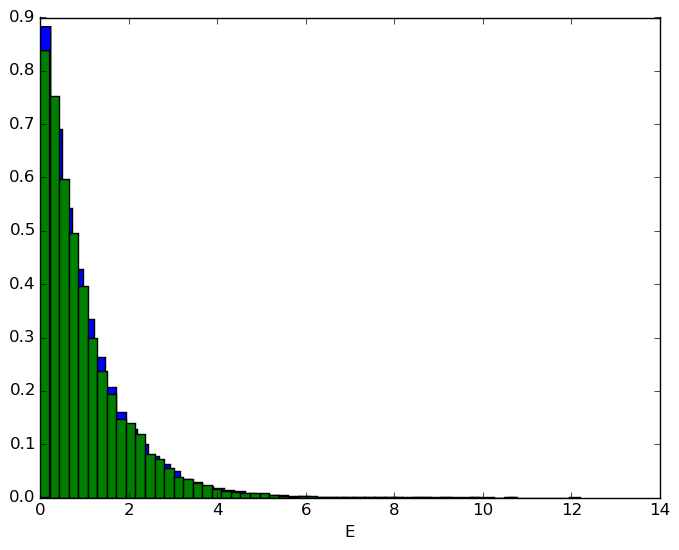

In [100]:
plt[:hist](vectorenergia, 50, normed =1);
plt[:hist](E, 50, normed =1);
plt[:xlabel]("E");

## Hamiltoniano de Contacto

In [106]:
h = ((cosh(S).*S.^(-2/3)*2).*exp(1/2*beta.*E));
#h = cosh(S);

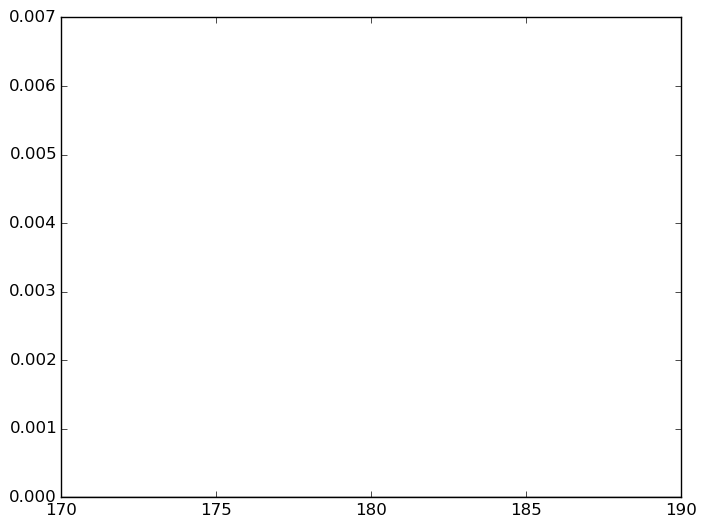

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f35a06585d0>

In [117]:
plt[:hist](h,nbins, normed = 1)
#plt[:hist](h,bins=logspace(0.1, 10, 50), normed = 1);
plt[:xlim](170.,190.)
fig = plt[:gca]()
#fig[:set_xscale]("log")
#fig[:set_yscale]("log")



In [103]:
fit(Pareto,h)

Distributions.Pareto(α=0.2817068677538282, θ=0.011126506569539046)

## Información adicional

In [64]:
using StatsBase
using Distributions
using KernelDensity

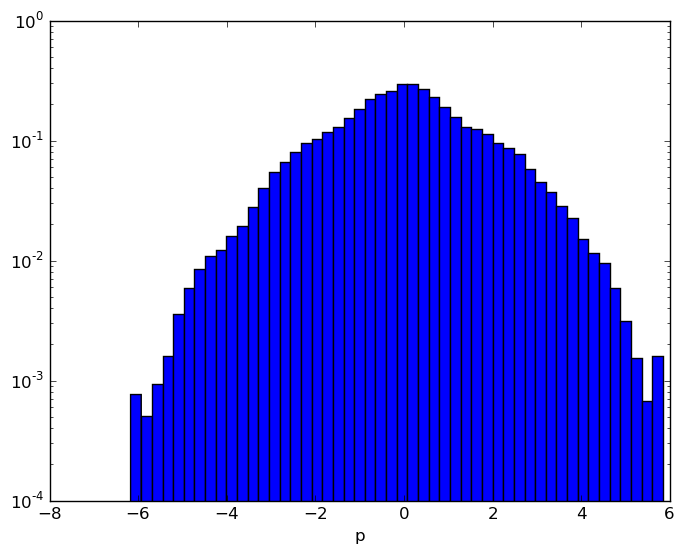

PyObject <matplotlib.text.Text object at 0x7fc8504ee2d0>

In [133]:
plt[:hist](p, nbins, normed = 1)
f = plt[:gca]()
f[:set_yscale]("log")
plt[:xlabel]("p")

In [134]:
fit(Normal,p)

Distributions.Normal(μ=0.014786244509524218, σ=1.6732773096706866)

In [139]:
fit(Normal,q)

Distributions.Normal(μ=0.007456407312189367, σ=1.4143483265726624)

In [140]:
ECDF = ecdf(p) #Empirical Cumulative Distribution Function

ef (generic function with 2 methods)

In [141]:
intervalo = [-5.0:0.01:5.0;];

In [142]:
CCDF = 1. - ECDF(intervalo)  #Complementary Cumulative Distribution function;

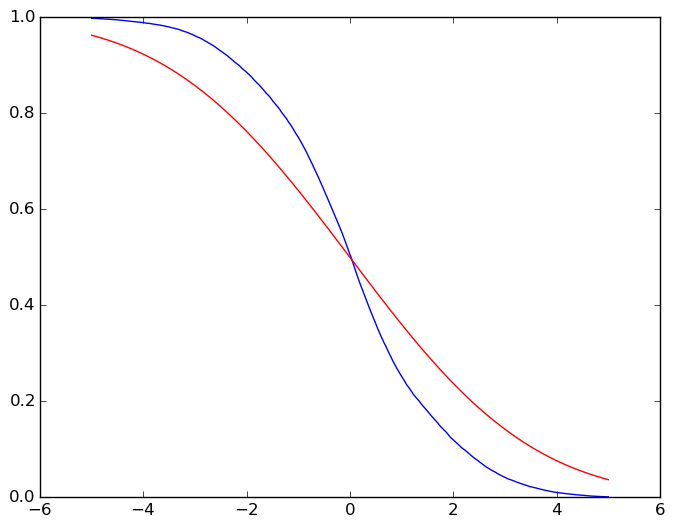

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc8500e5110>

In [143]:
plot(intervalo, CCDF, "b")
plot(intervalo, 1. - cdf(Normal(0.,2.8),intervalo), "r")

## Kernel Estimator

In [144]:
k = kde(p)

KernelDensity.UnivariateKDE{FloatRange{Float64}}(-6.795396086362774:0.006481050641624216:6.464833526400372,[1.28374e-7,1.2675e-7,1.28689e-7,1.34209e-7,1.43407e-7,1.56453e-7,1.73597e-7,1.95166e-7,2.21572e-7,2.53314e-7  …  3.93687e-7,3.39415e-7,2.93234e-7,2.5422e-7,2.21574e-7,1.94615e-7,1.72769e-7,1.5556e-7,1.42607e-7,1.33616e-7])

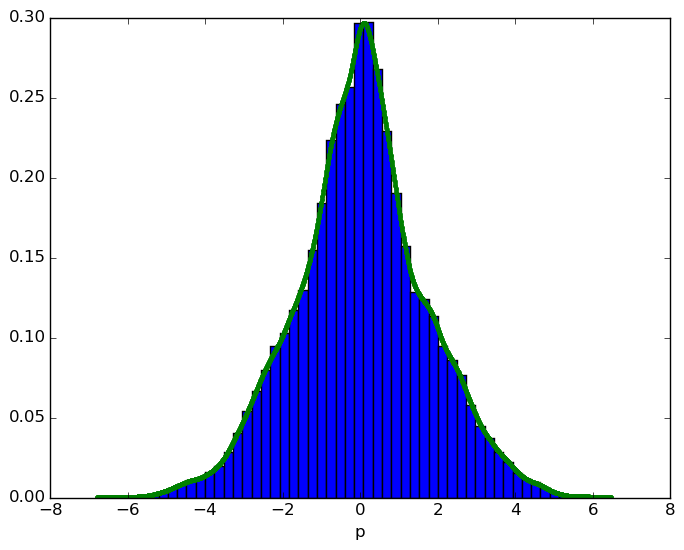

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc85009a290>

In [145]:
plt[:hist](p, 50, normed = 1)
plt[:xlabel]("p")
plot(k,"g.")